In [1]:
from tensorflow import keras
import data_reader

2023-10-20 17:03:18.577773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/songye/opt/anaconda3/envs/aiffel/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
EPOCHS = 1

In [3]:
dr = data_reader.DataReader()



Data Read Done!
Training X Size : (4128, 189)
Training Y Size : (4128,)
Test X Size : (1032, 189)
Test Y Size : (1032,)




In [4]:
model = keras.Sequential([
    keras.layers.Embedding(8983, 128),
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

2023-10-20 17:03:23.325259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer="adam", metrics=['accuracy'],
              loss="binary_crossentropy")

In [6]:
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
129/129 [==============================] - ETA: 0s - loss: 0.2234 - accuracy: 0.9251WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff698d5b320> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

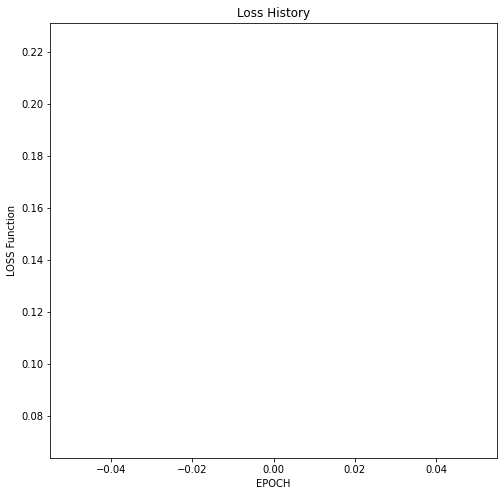

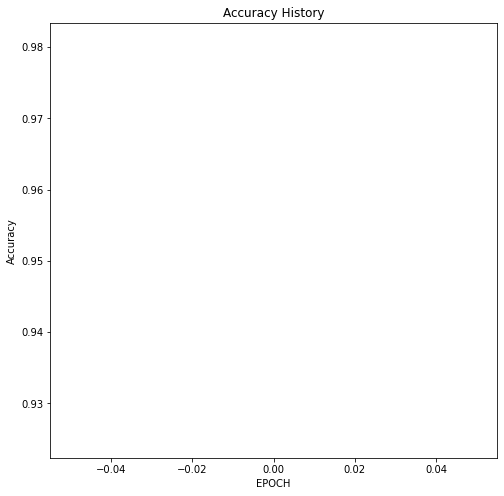

In [7]:
data_reader.draw_graph(history)